# Desafio da Sprint:
 

### Carregando Arquivo CSV

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/mggir/OneDrive/Área de Trabalho/exercicios/Desafio/googleplaystore.csv"
data = pd.read_csv(file_path)
print(data.head(0))

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


### Removendo Linhas Duplicadas


In [157]:
data = data.drop_duplicates()
data = data.drop_duplicates(subset=['App'])

print(f"Linhas após remoção de duplicatas: {data.shape[0]}")

Linhas após remoção de duplicatas: 9660


### Conversão da coluna Installs para Numerico

In [159]:
data['Installs'] = data['Installs'].str.replace(',', '') 
data['Installs'] = data['Installs'].str.replace('+', '')  
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')  

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data = data.dropna(subset=['Installs', 'Reviews'])

### Gráfico de Barras: 5 APPS por número de instalação

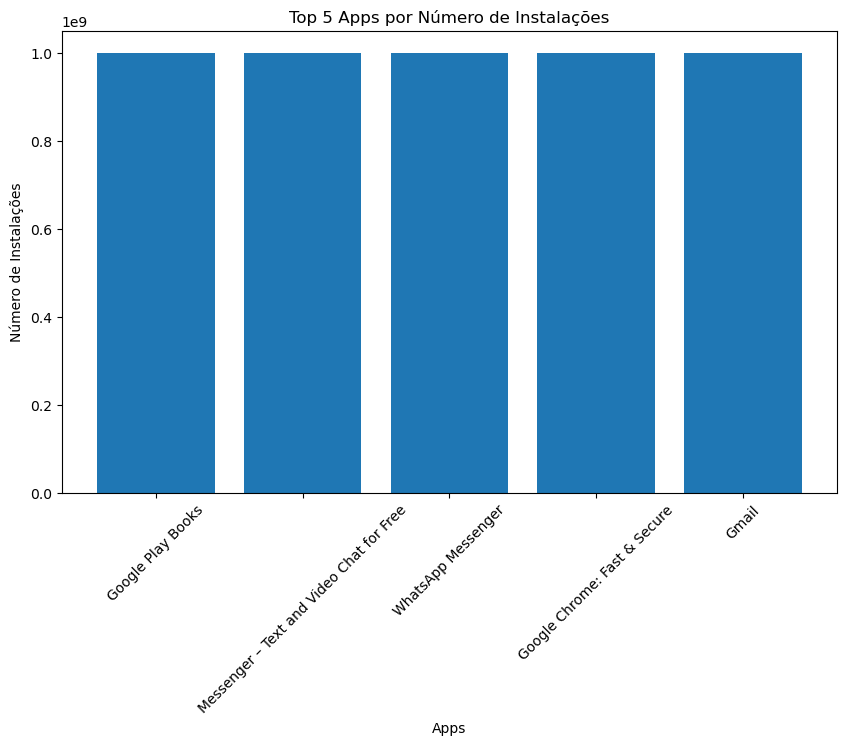

In [161]:
top_5_apps = data.nlargest(5, 'Installs')
plt.figure(figsize=(10, 6))
plt.bar(top_5_apps['App'], top_5_apps['Installs'])
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45)
plt.show()

### Pie Chart: Categorias dos APPS

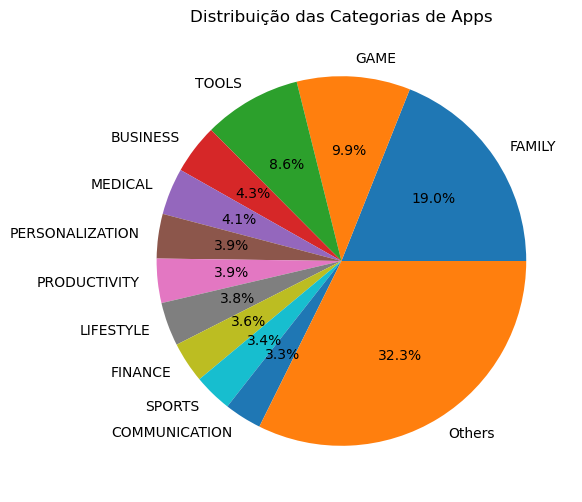

In [163]:
category_counts = data['Category'].value_counts()
threshold = 0.03 * category_counts.sum()
others_count = category_counts[category_counts < threshold].sum()
category_counts = category_counts[category_counts >= threshold]
category_counts = pd.concat([category_counts, pd.Series({'Others': others_count})])

plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribuição das Categorias de Apps')
plt.show()

### APP Mais Caro do Dataset

In [165]:
data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace('$', '').str.replace(',', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

data = data.dropna(subset=['Price'])

data['Price'] = data['Price'].astype(float)

most_expensive_app = data.loc[data['Price'].idxmax()]
print("App mais caro:", most_expensive_app['App'], "- Preço:", most_expensive_app['Price'])

App mais caro: I'm Rich - Trump Edition - Preço: 400.0


### APPS com Classificação Mature 17+

In [167]:
mature_17_count = data[data['Content Rating'] == 'Mature 17+'].shape[0]
print("Quantidade de apps classificados como 'Mature 17+':", mature_17_count)

Quantidade de apps classificados como 'Mature 17+': 393


### Top 10 APPS por Número de Reviews

In [169]:
top_10_reviews = data.nlargest(10, 'Reviews')
print("Top 10 Apps por Número de Reviews:")
print(top_10_reviews[['App', 'Reviews']])

Top 10 Apps por Número de Reviews:
                                                    App     Reviews
2544                                           Facebook  78158306.0
336                                  WhatsApp Messenger  69119316.0
2545                                          Instagram  66577313.0
335            Messenger – Text and Video Chat for Free  56642847.0
1670                                     Clash of Clans  44891723.0
4005            Clean Master- Space Cleaner & Antivirus  42916526.0
1654                                     Subway Surfers  27722264.0
3665                                            YouTube  25655305.0
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999.0
1660                                       Clash Royale  23133508.0


### Outros Cálculos sobre o Dataset

In [171]:
data['Reviews'] = data['Reviews'].astype(int)
family_data = data[data['Category'] == 'MEDICAL']

top_5_family_reviews = family_data.nlargest(5, 'Reviews')[['App', 'Reviews']]
print("Top 5 apps por número de reviews na categoria 'Medical':")
print(top_5_family_reviews)

least_installed_app = data.loc[data['Installs'].idxmin()]
print("App com menor número de instalações:", least_installed_app['App'], "- Instalações:", least_installed_app['Installs'])

Top 5 apps por número de reviews na categoria 'Medical':
                                                   App  Reviews
2319                      My Calendar - Period Tracker   156410
2307  Ovia Pregnancy Tracker & Baby Countdown Calendar   102858
2330                           Ada - Your Health Guide    87418
2311                            Pregnancy Week By Week    78825
2305                                   FollowMyHealth®    73118
App com menor número de instalações: Popsicle Launcher for Android P 9.0 launcher - Instalações: 0.0


### Outras Formas Gráficas

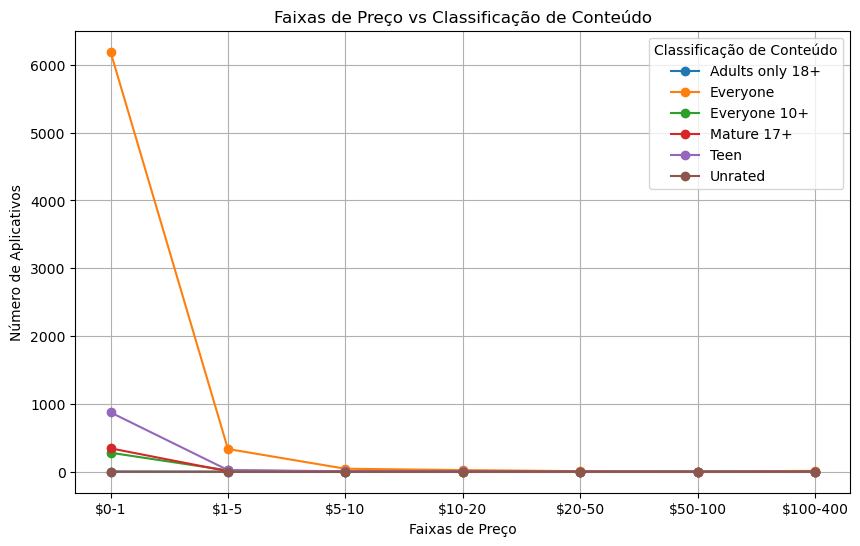

In [173]:
data['Installs'] = data['Installs'].astype(str).str.replace(',', '').str.replace('+', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Price'] = data['Price'].astype(str).str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

data = data.dropna(subset=['Installs', 'Reviews', 'Price', 'Rating'])

bins = [0, 1, 5, 10, 20, 50, 100, 400]
labels = ['$0-1', '$1-5', '$5-10', '$10-20', '$20-50', '$50-100', '$100-400']
data['PriceRange'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

price_content = data.groupby(['PriceRange', 'Content Rating'], observed=True).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
for content_rating in price_content.columns:
    plt.plot(price_content.index, price_content[content_rating], marker='o', label=content_rating)

plt.title('Faixas de Preço vs Classificação de Conteúdo')
plt.xlabel('Faixas de Preço')
plt.ylabel('Número de Aplicativos')
plt.legend(title='Classificação de Conteúdo')
plt.grid(True)
plt.show()

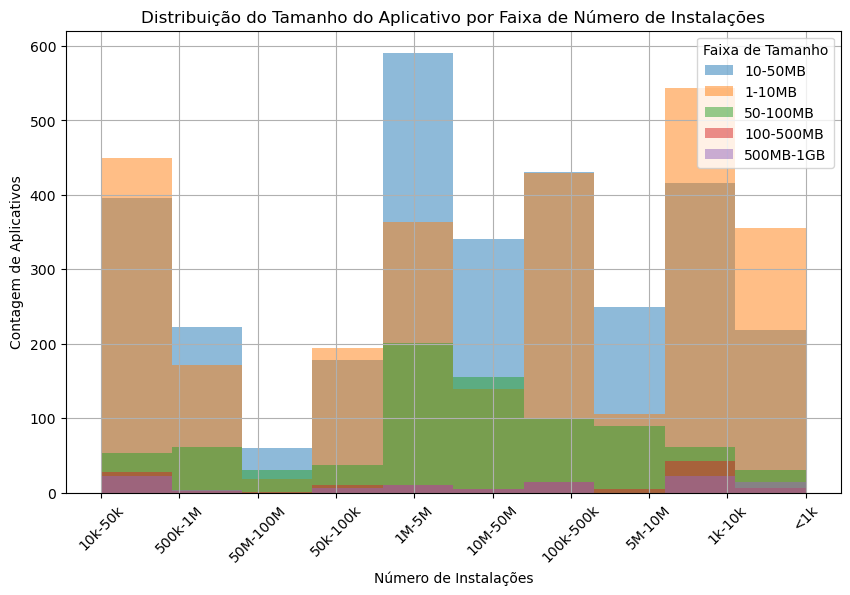

In [179]:
data['Installs'] = data['Installs'].astype(str).str.replace(',', '').str.replace('+', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')
data['Size'] = data['Size'].astype(str).str.replace('M', '').str.replace('k', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

data = data.dropna(subset=['Installs', 'Size'])

bins_size = [0, 1, 10, 50, 100, 500, 1000]
labels_size = ['<1MB', '1-10MB', '10-50MB', '50-100MB', '100-500MB', '500MB-1GB']
data['SizeRange'] = pd.cut(data['Size'], bins=bins_size, labels=labels_size, right=False)

bins_installs = [0, 1000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
labels_installs = ['<1k', '1k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M']
data['InstallsRange'] = pd.cut(data['Installs'], bins=bins_installs, labels=labels_installs, right=False)

data = data.dropna(subset=['InstallsRange', 'SizeRange'])

data['InstallsRange'] = data['InstallsRange'].astype(str)
data['SizeRange'] = data['SizeRange'].astype(str)

plt.figure(figsize=(10, 6))
for size_range in data['SizeRange'].unique():
    subset = data[data['SizeRange'] == size_range]
    plt.hist(subset['InstallsRange'], bins=len(labels_installs), alpha=0.5, label=size_range)

plt.title('Distribuição do Tamanho do Aplicativo por Faixa de Número de Instalações')
plt.xlabel('Número de Instalações')
plt.ylabel('Contagem de Aplicativos')
plt.legend(title='Faixa de Tamanho')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()